# Imputation
### K-nearest-neigbors algorithm (KNN) # Vecinos más cercanos. K = # of neigbors

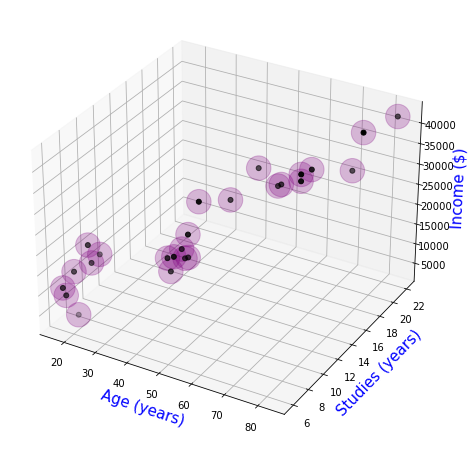

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Context

ages = np.array([17,18,18,19,20,
                 21,21,40,41,42,
                 42,43,44,44,45,
                 50,54,60,61,67,
                 67,68,76,79,83])

study = np.array([6,6,7,7,8,
                  8,9,10,10,10,
                  11,11,11,11,12,
                  14,16,16,16,16,
                  16,17,19,19,22])

income = np.array([11230,9624,13798,3215,19169,
                   14982,15419,17286,14232,18092,
                   18318,16260,22347,16710,28949,
                   27309,32779,29743,30341,34088,
                   32435,33909,32263,42067,42295])

data = np.stack((ages, study, income), axis=1)

# Tri-dimentional graph with all of data

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(data.T[0], data.T[1], data.T[2],
          marker='o', c='purple', s=600, alpha=0.25)
ax.scatter(data.T[0], data.T[1], data.T[2],
          marker='.', c='black', s=100)

ax.set_xlabel('Age (years)',    fontsize=15, color='blue')
ax.set_ylabel('Studies (years)',  fontsize=15, color='blue')
ax.set_zlabel('Income ($)',     fontsize=15, color='blue')

plt.show()






#### Note: Don't forget to scale the data 

## Pre-processing
### Scaling the data

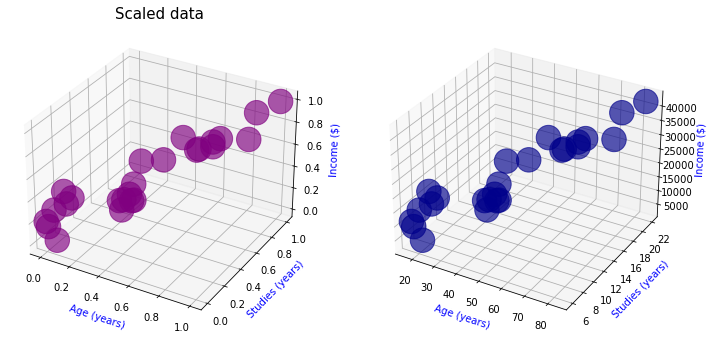

In [13]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Tri-dimentional graph with scaled data and the original data

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1,2,1, projection='3d')

ax.scatter(scaled_data.T[0],
           scaled_data.T[1], 
           scaled_data.T[2],
          marker='o', c='purple', s=600, alpha=0.65)

ax.set_title('Scaled data',      fontsize=15)
ax.set_xlabel('Age (years)',     fontsize=10, color='blue')
ax.set_ylabel('Studies (years)', fontsize=10, color='blue')
ax.set_zlabel('Income ($)',      fontsize=10, color='blue')

ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(data.T[0], 
           data.T[1], 
           data.T[2],
          marker='o', c='darkblue', s=600, alpha=0.65)

ax.set_xlabel('Age (years)',     fontsize=10, color='blue')
ax.set_ylabel('Studies (years)', fontsize=10, color='blue')
ax.set_zlabel('Income ($)',      fontsize=10, color='blue')

plt.show()

# Missing data
### Not a number (NaN) of Numpy

In [14]:
scaled_data

array([[0.        , 0.        , 0.20509212],
       [0.01515152, 0.        , 0.16399693],
       [0.01515152, 0.0625    , 0.27080348],
       [0.03030303, 0.0625    , 0.        ],
       [0.04545455, 0.125     , 0.40823951],
       [0.06060606, 0.125     , 0.30110031],
       [0.06060606, 0.1875    , 0.3122825 ],
       [0.34848485, 0.25      , 0.36005629],
       [0.36363636, 0.25      , 0.2819089 ],
       [0.37878788, 0.25      , 0.38068066],
       [0.37878788, 0.3125    , 0.38646366],
       [0.39393939, 0.3125    , 0.33380246],
       [0.40909091, 0.3125    , 0.48955988],
       [0.40909091, 0.3125    , 0.3453173 ],
       [0.42424242, 0.375     , 0.65849539],
       [0.5       , 0.5       , 0.61653019],
       [0.56060606, 0.625     , 0.75649949],
       [0.65151515, 0.625     , 0.67881269],
       [0.66666667, 0.625     , 0.69411464],
       [0.75757576, 0.625     , 0.78999488],
       [0.75757576, 0.625     , 0.74769703],
       [0.77272727, 0.6875    , 0.78541453],
       [0.

### We are simulating missing values

In [15]:
missing = scaled_data.copy()
missing[[2,7,12,17,22],2] = np.nan
missing


array([[0.        , 0.        , 0.20509212],
       [0.01515152, 0.        , 0.16399693],
       [0.01515152, 0.0625    ,        nan],
       [0.03030303, 0.0625    , 0.        ],
       [0.04545455, 0.125     , 0.40823951],
       [0.06060606, 0.125     , 0.30110031],
       [0.06060606, 0.1875    , 0.3122825 ],
       [0.34848485, 0.25      ,        nan],
       [0.36363636, 0.25      , 0.2819089 ],
       [0.37878788, 0.25      , 0.38068066],
       [0.37878788, 0.3125    , 0.38646366],
       [0.39393939, 0.3125    , 0.33380246],
       [0.40909091, 0.3125    ,        nan],
       [0.40909091, 0.3125    , 0.3453173 ],
       [0.42424242, 0.375     , 0.65849539],
       [0.5       , 0.5       , 0.61653019],
       [0.56060606, 0.625     , 0.75649949],
       [0.65151515, 0.625     ,        nan],
       [0.66666667, 0.625     , 0.69411464],
       [0.75757576, 0.625     , 0.78999488],
       [0.75757576, 0.625     , 0.74769703],
       [0.77272727, 0.6875    , 0.78541453],
       [0.

### To estimate and complete missinf values with KNN

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer_uniform = imputer.fit_transform(missing)

imputer = KNNImputer(n_neighbors=5, weights='distance')
imputer_distance = imputer.fit_transform(missing)

np.stack((imputer_uniform, imputer_distance), axis=1)



array([[[0.        , 0.        , 0.20509212],
        [0.        , 0.        , 0.20509212]],

       [[0.01515152, 0.        , 0.16399693],
        [0.01515152, 0.        , 0.16399693]],

       [[0.01515152, 0.0625    , 0.21568577],
        [0.01515152, 0.0625    , 0.12480668]],

       [[0.03030303, 0.0625    , 0.        ],
        [0.03030303, 0.0625    , 0.        ]],

       [[0.04545455, 0.125     , 0.40823951],
        [0.04545455, 0.125     , 0.40823951]],

       [[0.06060606, 0.125     , 0.30110031],
        [0.06060606, 0.125     , 0.30110031]],

       [[0.06060606, 0.1875    , 0.3122825 ],
        [0.06060606, 0.1875    , 0.3122825 ]],

       [[0.34848485, 0.25      , 0.3456346 ],
        [0.34848485, 0.25      , 0.32663701]],

       [[0.36363636, 0.25      , 0.2819089 ],
        [0.36363636, 0.25      , 0.2819089 ]],

       [[0.37878788, 0.25      , 0.38068066],
        [0.37878788, 0.25      , 0.38068066]],

       [[0.37878788, 0.3125    , 0.38646366],
        [0.378

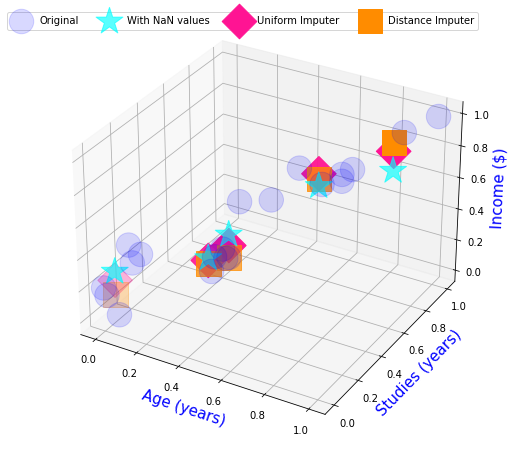

In [19]:
fig = plt.figure(figsize=(8,8))

filtro = ~np.isnan(missing.T[2])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(scaled_data.T[0][filtro],
           scaled_data.T[1][filtro], 
           scaled_data.T[2][filtro],
           label = 'Original',
           marker='o', c='blue', s=600, alpha=0.15)

ax.scatter(scaled_data.T[0][~filtro],
           scaled_data.T[1][~filtro], 
           scaled_data.T[2][~filtro],
           label = 'With NaN values',
           marker='*', c='cyan', s=800, alpha=0.65)

ax.scatter(imputer_uniform.T[0][~filtro],
           imputer_uniform.T[1][~filtro], 
           imputer_uniform.T[2][~filtro],
           label = 'Uniform Imputer',
           marker='D', c='deeppink', s=600)

ax.scatter(imputer_distance.T[0][~filtro],
           imputer_distance.T[1][~filtro], 
           imputer_distance.T[2][~filtro],
           label = 'Distance Imputer',
           marker='s', c='darkorange', s=600)


ax.set_xlabel('Age (years)',     fontsize=15, color='blue')
ax.set_ylabel('Studies (years)', fontsize=15, color='blue')
ax.set_zlabel('Income ($)',      fontsize=15, color='blue')
ax.legend(ncol=4)

plt.show()